<a href="https://colab.research.google.com/github/codybaraks/Mchezopesa-Ltd/blob/master/Mchezopesa_Ltd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DEFINE QUESTION**

## **METRICS FOR SUCCESS**

## **THE CONTEXT**

## **EXPERIEMENTAL DESIGN**

In [0]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
%matplotlib inline
# Import time date
import datetime
import scipy as sc

In [2]:
# Load fifa ranking dataset
fifa_ranking = pd.read_csv("fifa_ranking.csv")
fifa_ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
# Loading the Dataset
# Reading the dataset
fifa = pd.read_csv("results.csv")
fifa.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
# fifa ranking shape
fifa_ranking.shape

(57793, 16)

In [5]:
# Checking the shape of the results dataset
fifa.shape

(40839, 9)

Consists of about 9 columns

In [6]:
# fifa ranking size
fifa_ranking.size

924688

In [7]:
# Check the size of the results dataset
fifa.size


367551

In [8]:
# results fifa ranking dataset info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [9]:
# Getting  a bit information from the dataframe
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [10]:
# Describing the data
fifa.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [11]:
pp.ProfileReport(fifa) # pandas


Number of variables,9
Number of observations,40839
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,65.0 B
Numeric,2
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [12]:
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [0]:
# ## Dropping irrelevant columns  -  fifa ranking
fifa_ranking.drop(columns=['country_abrv','cur_year_avg',
      'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
      'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
      'three_year_ago_weighted'], inplace=True)

In [14]:
fifa_ranking.dtypes

rank                 int64
country_full        object
total_points       float64
previous_points      int64
rank_change          int64
confederation       object
rank_date           object
dtype: object

In [0]:
# convert column date into datetime format
# import datetime
# convert column date into datetime format

fifa['date'] = pd.to_datetime(fifa['date'])
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])

# splitting the datetime column into month and year
fifa['year'], fifa['month'] = fifa['date'].dt.year, fifa['date'].dt.month
fifa_ranking['year'], fifa_ranking['month'] = fifa_ranking['rank_date'].dt.year, fifa_ranking['rank_date'].dt.month

In [0]:
# Merge the two datasets
# "pd.merge(df1, df2, on='employee')"
# fifa_main = pd.concat([fifa_ranking, fifa, on=""], axis=1 )
# fifa_main
# pd.merge(fifa_ranking, fifa, on='employee')")

fifa_main = fifa_ranking
fifa_main=fifa_main.rename({'country_full': 'home_team'}, axis=1)
fifa_main=pd.merge(fifa, fifa_main, how='left', on=['home_team', 'year', 'month'])

In [18]:
fifa_main.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,total_points,previous_points,rank_change,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,NaN,NaN,NaT


In [19]:
fifa_main.shape

(40908, 17)

In [20]:
# Checking for null values after concatinating
fifa_main.isnull().sum()

date                   0
home_team              0
away_team              0
home_score             0
away_score             0
tournament             0
city                   0
country                0
neutral                0
year                   0
month                  0
rank               22299
total_points       22299
previous_points    22299
rank_change        22299
confederation      22299
rank_date          22299
dtype: int64

In [21]:
fifa_main.dropna()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,total_points,previous_points,rank_change,confederation,rank_date
17910,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19.0,0.00,36.0,16.0,CONMEBOL,1993-08-08
17911,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70.0,0.00,16.0,8.0,CONMEBOL,1993-08-08
17912,1993-08-01,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1993,8,22.0,0.00,47.0,-6.0,CONMEBOL,1993-08-08
17913,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,Venezuela,False,1993,8,94.0,0.00,4.0,31.0,CONMEBOL,1993-08-08
17914,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True,1993,8,58.0,0.00,27.0,-7.0,CAF,1993-08-08
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,8,59.0,0.00,13.0,28.0,CONMEBOL,1993-08-08
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,8.0,0.00,55.0,-5.0,CONMEBOL,1993-08-08
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,8,35.0,0.00,23.0,30.0,CONMEBOL,1993-08-08
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,8,65.0,0.00,23.0,-2.0,CAF,1993-08-08
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,67.0,0.00,22.0,1.0,CONMEBOL,1993-08-08


In [0]:
# Drop all missing values
fifa_main=fifa_main.dropna()

In [38]:
# Checking if null values are removed
fifa_main.isnull().sum()

date               0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
city               0
country            0
neutral            0
year               0
month              0
rank               0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

In [23]:
# Convert to neutral column to Binary
conv = pd.get_dummies(fifa_main['neutral'], drop_first=True)
conv

,True
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [0]:
fifa_main["neutral"]= conv[True]

In [25]:
# # Checking corelation
# sns.heatmap(fifa_main)
fifa_main.dtypes

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                     uint8
year                        int64
month                       int64
rank                      float64
total_points              float64
previous_points           float64
rank_change               float64
confederation              object
rank_date          datetime64[ns]
dtype: object

In [26]:
fifa_main['home_score'].corr(fifa_main['rank'])

-0.11143973207725796

In [27]:
fifa_main.shape

(40908, 17)

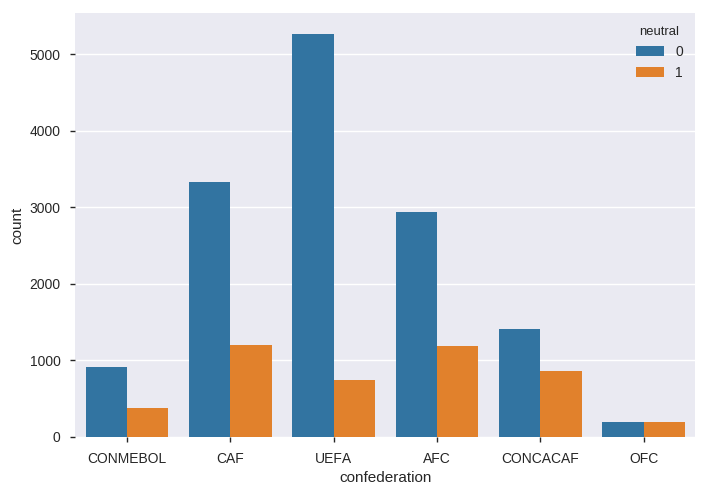

In [28]:
sns.countplot(x='confederation', data=fifa_main, hue='neutral')

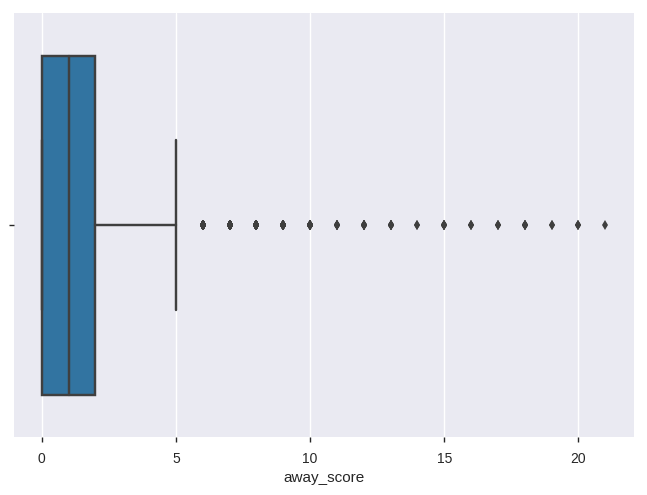

In [29]:
# Away score outliers
sns.boxplot(x = 'away_score',hue='home_score',data=fifa_main)

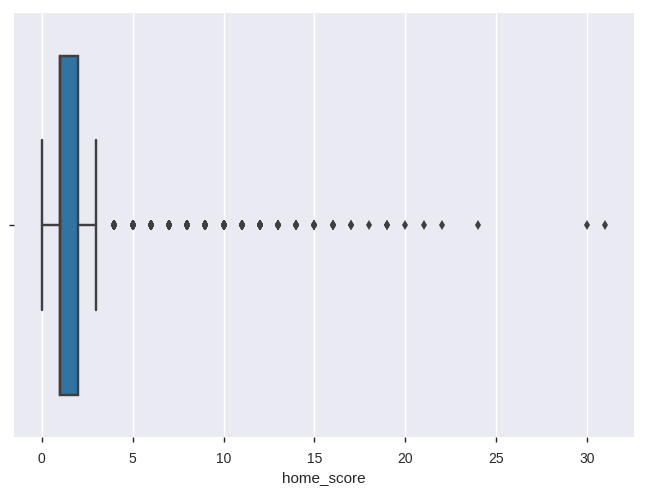

In [30]:
# Home score outliers
sns.boxplot(x = 'home_score',hue='away_score',data=fifa_main)

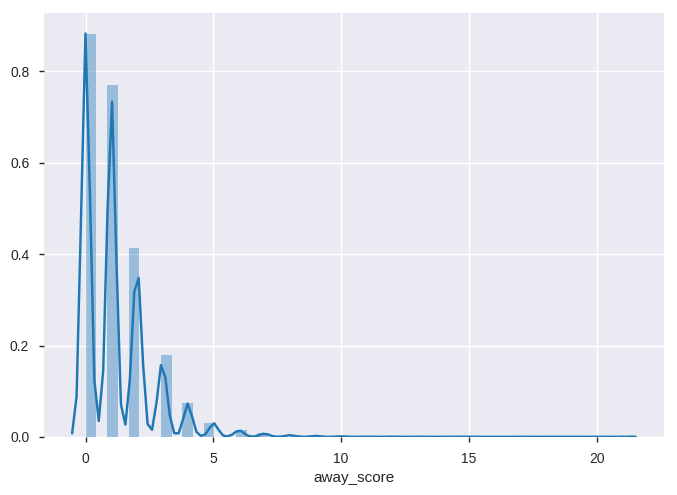

In [31]:
# Distribution plot fo away score
# distplot
sns.distplot(fifa_main['away_score'])

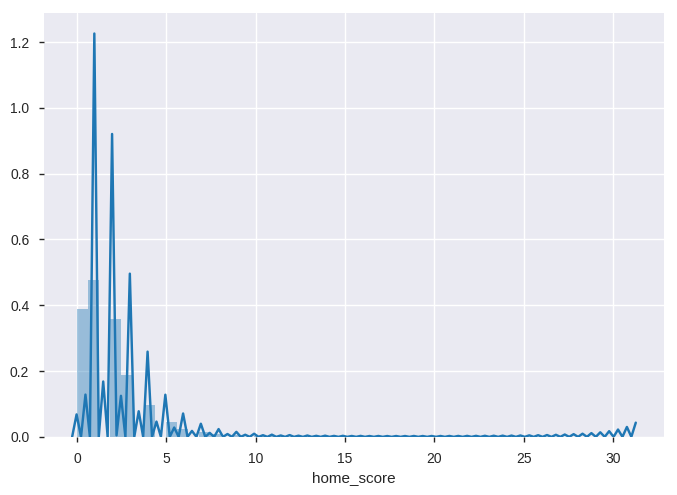

In [32]:
sns.distplot(fifa_main['home_score'])

In [33]:
fifa_main.dtypes

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                     uint8
year                        int64
month                       int64
rank                      float64
total_points              float64
previous_points           float64
rank_change               float64
confederation              object
rank_date          datetime64[ns]
dtype: object

## **Polynomial Regression -  Approach 1**

In [0]:
# Checking if columns have been droped
# X.head(5)

In [0]:
# sns.heatmap(X)
fifa_main['home_score'].corr(fifa_main['rank'])

In [0]:
fifa_main['home_score'].corr(fifa_main['total_points'])

In [0]:
fifa_main['home_score'].corr(fifa_main['previous_points'])

In [0]:
fifa_main['home_score'].corr(fifa_main['rank_change'])

In [0]:
fifa_main.dtypes

In [0]:
# Split the dataset
# X = wine.drop(['quality'],axis=1)
# X = fifa_main.drop(['country_full','country_abrv','confederation','rank_date','date', 'home_team','away_team','tournament','city','country'],axis=1)
X = fifa_main['rank'].values
y = fifa_main['home_score'].values

X = X.reshape(-1,1)
# y = y.reshape(-1,1)

In [40]:
print(X)
print(y)

[[19.]
 [70.]
 [22.]
 ...
 [12.]
 [ 7.]
 [14.]]
[0 0 0 ... 0 4 2]


In [0]:
# Import train test split
from sklearn.model_selection import train_test_split

In [0]:
# Train the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [43]:
X.shape

(18609, 1)

In [44]:
y.shape

(18609,)

In [46]:
# Fit polynormial regression to dataset
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

pol_li = LinearRegression()
pol_li.fit(X_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Fit a Linear Regression
fifa_reg = LinearRegression()
fifa_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ValueError: ignored

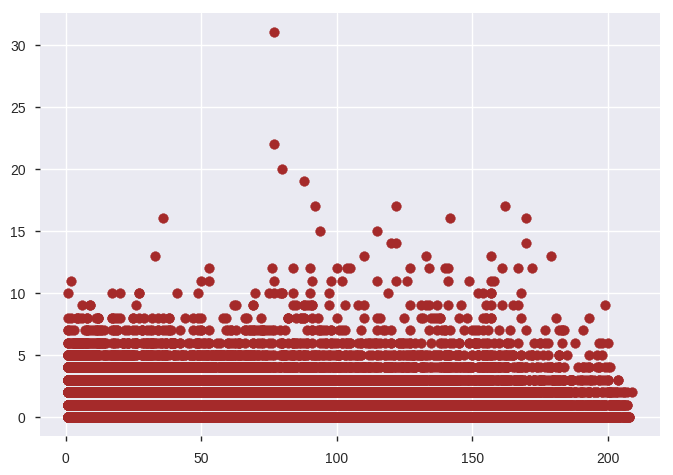

In [48]:
# Plotting LogisticRegression

plt.scatter(X,y,color="brown")
plt.plot(X, fifa_reg.predict(X), color="red")
plt.title("Home scores And  Rank", color="brown")
plt.xlabel("Ranking",color="brown")
plt.ylabel("Home Score",color="brown")

In [0]:
# Carrying out the prediction
# Predict using Polynomial Regression

X_predict = fifa_reg.predict(X_poly)


Text(0, 0.5, 'Home Score')

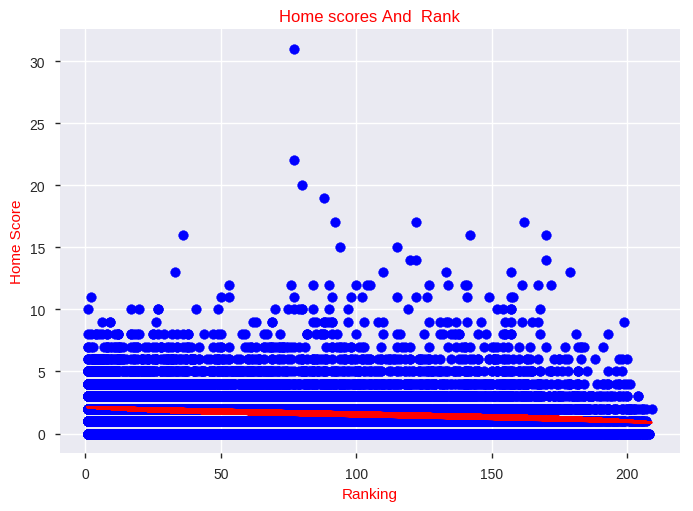

In [51]:
plt.scatter(X,y,color="blue")
plt.plot(X,X_predict,color="red")
plt.title("Home scores And  Rank", color="red")
plt.xlabel("Ranking",color="red")
plt.ylabel("Home Score",color="red")

In [52]:
fifa_main['rank'].nunique()

209

In [64]:
print("prediction for linear Regression is",pol_li )

prediction for linear Regression is LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [53]:
# Polynomial Regression Predition
print("prediction for Polynomial Regression is", X_predict)

prediction for Polynomial Regression is [1.87054556 1.5617355  1.8377733  ... 1.9561792  2.02565948 1.93036247]


**Predition for The number of goals scored by the Home team is 2**

In [54]:
X_predict

array([1.87054556, 1.5617355 , 1.8377733 , ..., 1.9561792 , 2.02565948,
       1.93036247])

In [55]:
fifa_main.describe()

,home_score,away_score,neutral,year,month,rank,total_points,previous_points,rank_change
count,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000
mean,1.622817,1.074910,0.245096,2006.467784,6.889462,77.831157,163.009199,425.994841,0.981998
std,1.660216,1.261695,0.430156,6.816722,3.285789,51.263254,309.043083,316.326216,6.915482
min,0.000000,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,-62.000000
25%,0.000000,0.000000,0.000000,2001.000000,4.000000,34.000000,0.000000,164.000000,-2.000000
50%,1.000000,1.000000,0.000000,2007.000000,7.000000,73.000000,0.000000,407.000000,0.000000
75%,2.000000,2.000000,0.000000,2012.000000,10.000000,114.000000,226.540000,609.000000,3.000000
max,31.000000,21.000000,1.000000,2018.000000,12.000000,209.000000,1775.030000,1887.000000,73.000000


In [76]:
# Actual vs Prediction
compar = pd.DataFrame({'Actual': y,'predicted': X_predict})
compar.describe()

,Actual,predicted
count,18609.000000,18609.000000
mean,1.622817,1.622817
std,1.660216,0.203026
min,0.000000,0.887799
25%,0.000000,1.523776
50%,1.000000,1.555802
75%,2.000000,1.728238
max,31.000000,2.118785


In [56]:
# Getting the RMSE Score
from sklearn import metrics
print('Root mean squaref Error:',np.sqrt(metrics.mean_squared_error(y,X_predict)))

Root mean squaref Error: 1.6477110556099892


In [57]:
# Geting the R2 Score
print("The R2 score is",metrics.r2_score(y,X_predict))

The R2 score is 0.014954611593638645


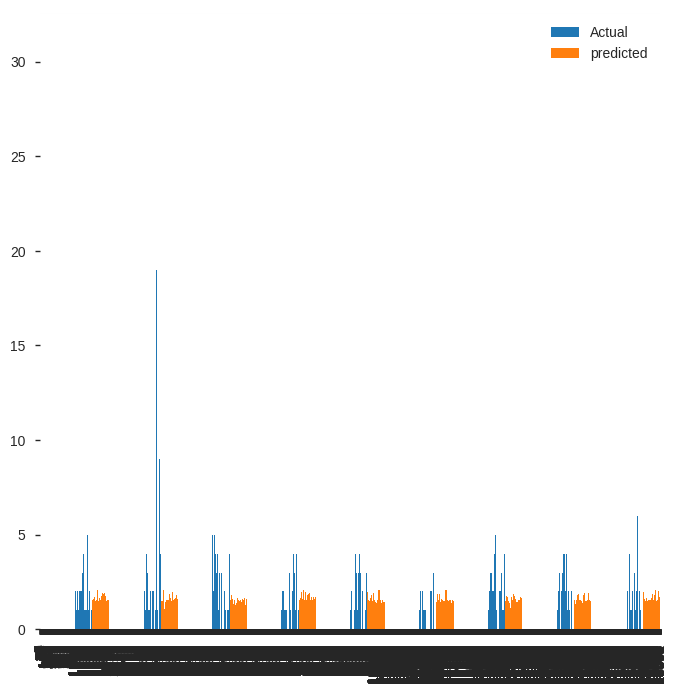

In [82]:
# Actual vs Predition plot
compar.plot(kind="bar",figsize=(8,8))
plt.show()

## **Model 2: Predict how many goals the away team scores**

In [0]:
X = fifa_main['rank'].values.reshape(-1,1)
y = fifa_main['away_score']

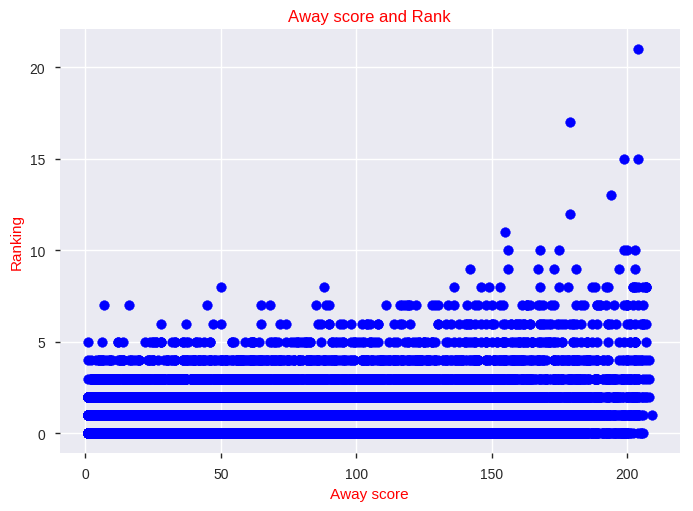

In [84]:
plt.scatter(X,y, color="blue")
plt.title("Away score and Rank",color = "red")
plt.xlabel("Away score", color = "red")
plt.ylabel("Ranking", color = "red")
plt.show()

In [0]:
# Train the Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.22, random_state=0)

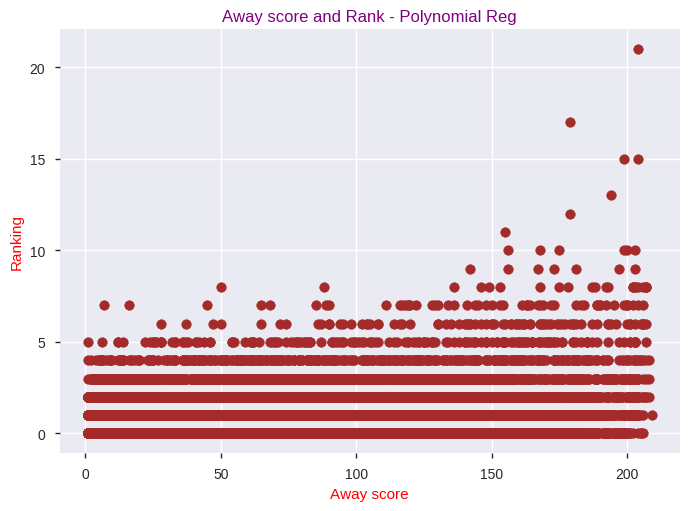

In [88]:
# fITTING Polynomial Regression
pol_reg = PolynomialFeatures(degree=3)
p_reg = pol_reg.fit_transform(X)

# Linear
poly_reg = LinearRegression()
poly_reg.fit(p_reg,y)

plt.scatter(X,y, color="brown")
plt.title("Away score and Rank - Polynomial Reg",color = "purple")
plt.xlabel("Away score", color = "red")
plt.ylabel("Ranking", color = "red")
plt.show()

In [98]:
prediction = poly_reg.predict(p_reg)
print("Polynomial prediction is: %d", prediction)

Polynomial prediction is: %d [0.84491802 1.00584998 0.86602829 ... 0.78703602 0.73764194 0.80486425]



###**Heteroskedasticity testing and Bartlett's test**

### Refers to the circumstance in which the variability of a variable is

### unequal across the range of values of a second variable that predicts it

In [0]:
# Bartlett's Test
# is used to test that variances are equal for all samples. 
# It checks that the assumption of equal variances is true before running certain statistical tests 

In [101]:
testing=np.subtract(X_predict, y)
pd.DataFrame(testing).describe()

,away_score
count,18609.000000
mean,0.547907
std,1.319038
min,-20.029187
25%,-0.238903
50%,0.666411
75%,1.539618
max,2.118785


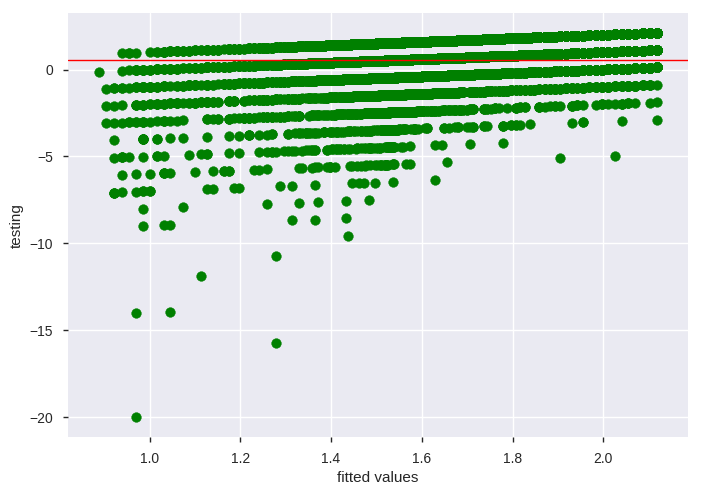

In [106]:
plt.scatter(X_predict,testing,color="green")
plt.ylabel("testing")
plt.xlabel('fitted values')
plt.axhline(y= testing.mean(), color='red', linewidth=1)
plt.show()

In [110]:
# Barlette's testing
# is used to test that variances are equal for all samples. 
# It checks that the assumption of equal variances is true before running certain statistical tests 
test_result, p_value = sc.stats.bartlett(X_predict, testing)

# Find critical value
degree_of_freedom = len(X_predict)-1
probability = 1 - p_value

critical_value = sc.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# Discover a pattern, Wether equal or Homogenous

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## **Logistic Regression**`